# SMAI Assignment - 2

## Question 3: Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA)
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

#### Tasks
1. Load dataset and divide the date into training and test sets.
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

#### Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from tqdm import tqdm

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [ ]:
!unzip ATnT.zip

Archive:  ATnT.zip
   creating: ATnT/
  inflating: ATnT/README             
   creating: ATnT/s39/
  inflating: ATnT/s39/10.pgm         
  inflating: ATnT/s39/9.pgm          
  inflating: ATnT/s39/8.pgm          
  inflating: ATnT/s39/2.pgm          
  inflating: ATnT/s39/7.pgm          
  inflating: ATnT/s39/1.pgm          
  inflating: ATnT/s39/6.pgm          
  inflating: ATnT/s39/5.pgm          
  inflating: ATnT/s39/4.pgm          
  inflating: ATnT/s39/3.pgm          
   creating: ATnT/s3/
  inflating: ATnT/s3/10.pgm          
  inflating: ATnT/s3/9.pgm           
  inflating: ATnT/s3/8.pgm           
  inflating: ATnT/s3/2.pgm           
  inflating: ATnT/s3/7.pgm           
  inflating: ATnT/s3/1.pgm           
  inflating: ATnT/s3/6.pgm           
  inflating: ATnT/s3/5.pgm           
  inflating: ATnT/s3/4.pgm           
  inflating: ATnT/s3/3.pgm           
   creating: ATnT/s16/
  inflating: ATnT/s16/6.pgm          
  inflating: ATnT/s16/10.pgm         
  inflating: ATnT/s1

In [ ]:
import os
import cv2
import numpy as np

trainAmt = 0.9
allFaces = []
labels = []

testFaces = []
testLabels = []

for i in range(1, 41):
    categoryFaces = []
    categoryLabels = []
    for j in range(1, 11):
        imgPath = os.path.join("ATnT", "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)
        categoryFaces.append(img)
        categoryLabels.append(i)

    testFaces.append(categoryFaces[0])
    testLabels.append(categoryLabels[0])
    allFaces.extend(categoryFaces[1:])
    labels.extend(categoryLabels[1:])

allFaces = np.array(allFaces)
labels = np.array(labels)
testFaces = np.array(testFaces)
testLabels = np.array(testLabels)

trainFaces = allFaces
trainFaces_flat = allFaces.reshape((allFaces.shape[0], -1))
testFaces_flat = testFaces.reshape((testFaces.shape[0], -1))


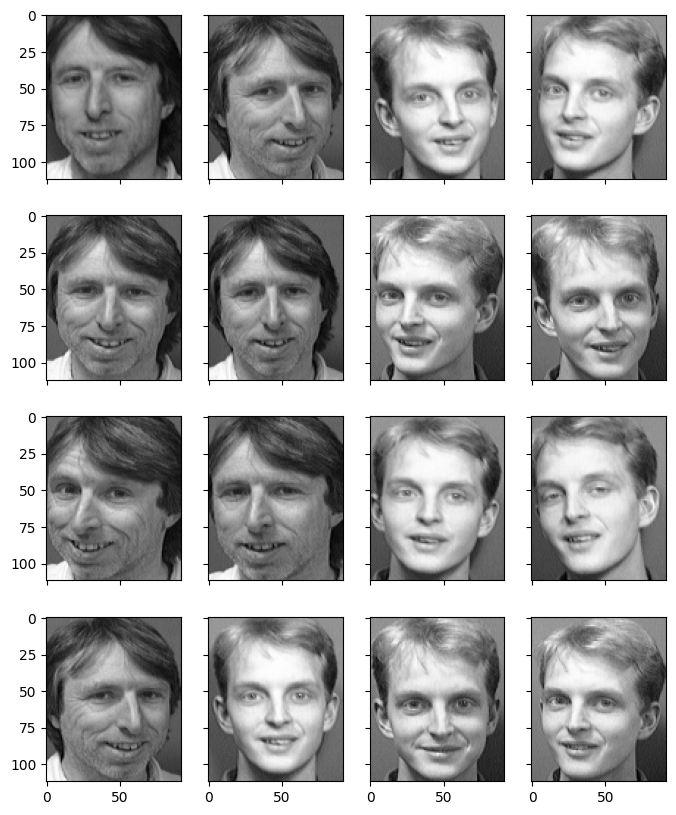

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(trainFaces)[-16:]
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
plt.show()

#### Implement PCA Algorithm.

The pca_compute_components function performs Principal Component Analysis (PCA) on a dataset X. It centers the data, computes the covariance matrix, and calculates eigenvalues and eigenvectors. These are sorted to prioritize the most significant components. The function then returns these sorted eigenvalues and eigenvectors, along with the mean of the original dataset (meanFace).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pca_compute_components(X):
    X_centered = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[idx]
    sorted_eigenvectors = eigenvectors[:, idx]
    return sorted_eigenvalues, sorted_eigenvectors, np.mean(X, axis=0)


eigenvalues, eigenvectors, meanFace = pca_compute_components(trainFaces_flat)


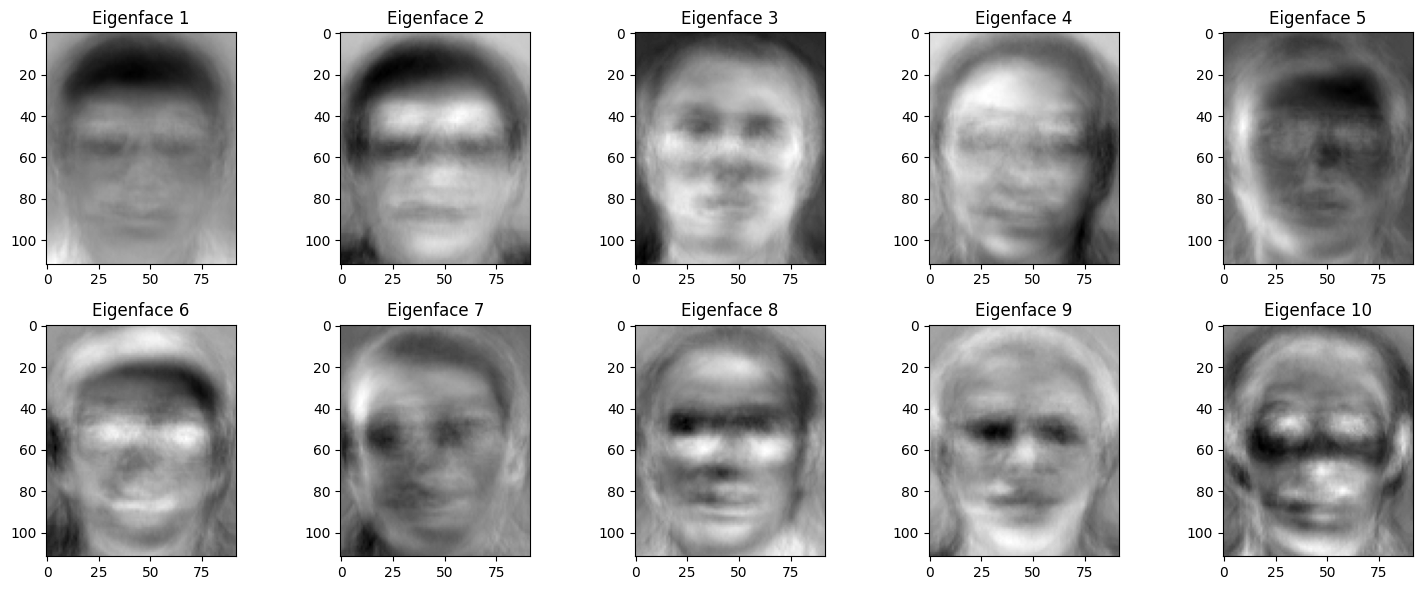

In [ ]:
def select_top_components_and_project(X, eigenvalues, eigenvectors, meanFace, n_components):
    principal_components = eigenvectors[:, :n_components]
    X_centered = X - meanFace
    X_pca = np.dot(X_centered, principal_components)
    return X_pca

def visualize_eigenfaces(eigenvectors, n_eigenfaces=10):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i in range(n_eigenfaces):
        ax = axes[i//5, i%5]
        eigenface = eigenvectors[:, i].reshape(112, 92)
        ax.imshow(eigenface, cmap='gray')
        ax.set_title(f'Eigenface {i+1}')
    plt.tight_layout()
    plt.show()

visualize_eigenfaces(eigenvectors, 10)


* The select_top_components_and_project function selects the top n_components principal components from the provided eigenvalues and eigenvectors. It then projects the centered data X onto these principal components, returning the resulting PCA-transformed data X_pca.

* The visualize_eigenfaces function visualizes the first n_eigenfaces eigenvectors (or eigenfaces) corresponding to the principal components. It displays these eigenfaces in a grid layout using matplotlib, allowing for visual inspection of the features captured by each principal component.

#### Implement Image Reconstruction from Eigenfaces


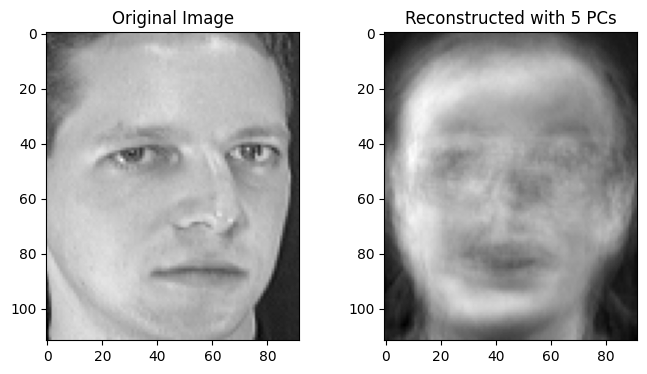

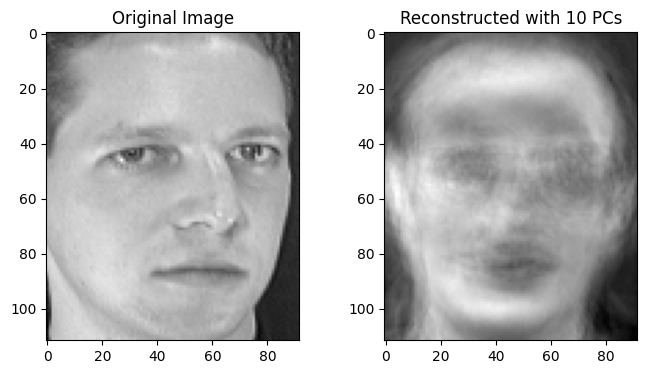

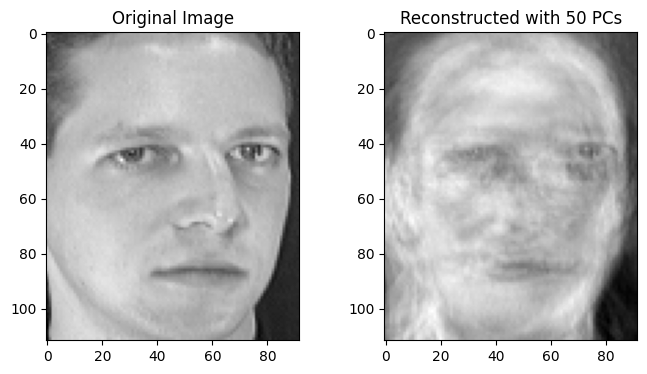

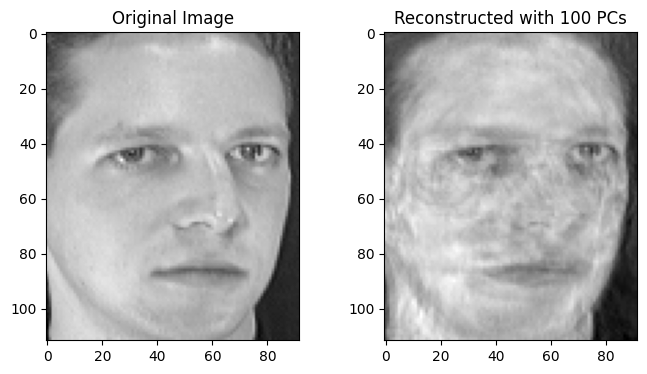

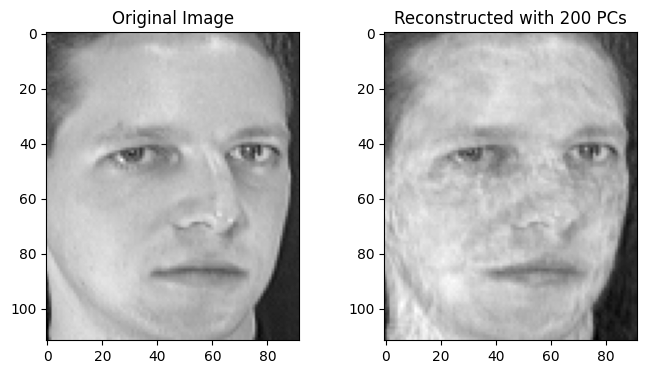

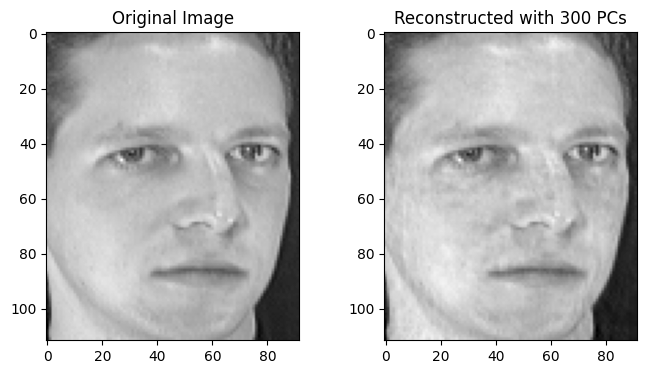

In [33]:
def reconstruct_from_pca(pca_transformed_img, eigenvectors, mean_face, n_components):
    used_eigenvectors = eigenvectors[:, :n_components]
    reconstructed_img_flat = np.dot(pca_transformed_img, used_eigenvectors.T) + mean_face
    reconstructed_img = reconstructed_img_flat.reshape((112, 92))
    return reconstructed_img

def visualize_for_different_components(components_list, trainFaces_flat, eigenvalues, eigenvectors, meanFace):
    for n_components in components_list:
        # Project the data onto the top n_components
        trainFaces_pca = select_top_components_and_project(trainFaces_flat, eigenvalues, eigenvectors, meanFace, n_components)
        pca_transformed_img = trainFaces_pca[0]
        reconstructed_img = reconstruct_from_pca(pca_transformed_img, eigenvectors, meanFace, n_components)

        # Visualize the reconstructed image
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(trainFaces_flat[0].reshape(112, 92), cmap='gray')  # Assuming original image shape is known
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(reconstructed_img, cmap='gray')
        plt.title(f'Reconstructed with {n_components} PCs')
        plt.show()

components_list = [5, 10, 50, 100, 200, 300]
visualize_for_different_components(components_list, trainFaces_flat, eigenvalues, eigenvectors, meanFace)


The function reconstruct_from_pca reconstructs an image from its PCA-transformed representation. It takes the PCA-transformed image pca_transformed_img, the eigenvectors, the mean face, and the number of components n_components used in the PCA transformation. The function first selects the eigenvectors corresponding to the top n_components, then reconstructs the flattened image using the dot product of the PCA-transformed image and the selected eigenvectors, adding the mean face to obtain the final reconstructed image.

The function visualize_for_different_components visualizes the reconstructed images for different numbers of principal components (n_components) from a list (components_list). It projects the training data onto the top n_components, then reconstructs and visualizes the first image from the training set for each number of components in components_list. The original image and its corresponding reconstruction are displayed side by side for comparison.



#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them.
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations.
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [ ]:
def getClass(test_image, eigenvectors, mean_face, X_train, y_train, n_components):
    principal_components = eigenvectors[:, :n_components]
    test_image_centered = test_image - mean_face
    test_image_projected = np.dot(test_image_centered, principal_components)

    X_train_centered = X_train - mean_face
    X_train_projected = np.dot(X_train_centered, principal_components)

    distances = np.linalg.norm(X_train_projected - test_image_projected, axis=1)

    min_distance_index = np.argmin(distances)
    prediction_class = y_train[min_distance_index]
    smallest_error = distances[min_distance_index]

    return X_train[min_distance_index], smallest_error, prediction_class


The getClass function classifies a test image by projecting it onto the principal components obtained from PCA and comparing it with the training set. It calculates the distances between the projected test image and each training image, selects the nearest neighbor, and returns its corresponding class label. The function also provides the nearest neighbor's image and the distance as additional information.

In [ ]:
test_image = testFaces_flat[3]
image_with_smallest_error, error_value, prediction_class = getClass(test_image, eigenvectors, meanFace, trainFaces_flat, labels, 50)


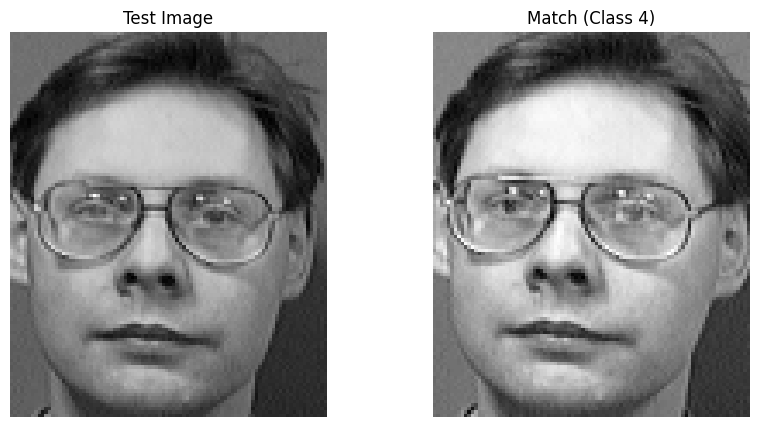

In [ ]:
test_image_reshaped = test_image.reshape((112, 92))
image_with_smallest_error_reshaped = image_with_smallest_error.reshape((112, 92))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(test_image_reshaped, cmap='gray')
axes[0].set_title('Test Image')

axes[1].imshow(image_with_smallest_error_reshaped, cmap='gray')
axes[1].set_title(f'Match (Class {prediction_class})')

for ax in axes:
    ax.axis('off')

plt.show()

Iterate through all the images in the test data and test the accuracy by taking different number of components

Accuracy with 5 components: 0.8250
Accuracy with 10 components: 0.9500
Accuracy with 15 components: 0.9500
Accuracy with 20 components: 0.9500
Accuracy with 25 components: 0.9750
Accuracy with 30 components: 0.9750
Accuracy with 40 components: 0.9750
Accuracy with 50 components: 0.9750
Accuracy with 100 components: 0.9750


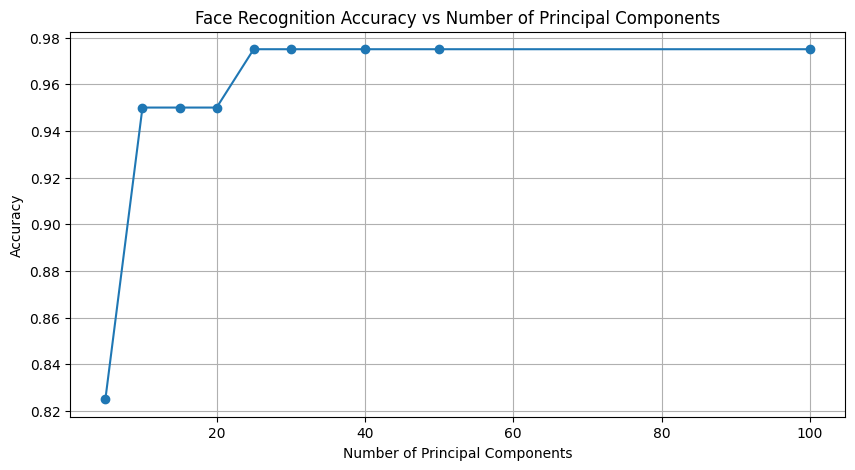

In [32]:
def compute_accuracy_for_n_components(n_components, eigenvectors, mean_face, X_train, y_train, X_test, y_test):
    correct_predictions = 0

    for i in range(len(X_test)):
        test_image = X_test[i]
        _, _, predicted_class = getClass(test_image, eigenvectors, mean_face, X_train, y_train, n_components)

        if predicted_class == y_test[i]:
            correct_predictions += 1

    accuracy = correct_predictions / len(X_test)
    return accuracy

n_components_list = [5, 10, 15, 20, 25, 30, 40, 50, 100]
accuracies = []

for n_components in n_components_list:
    accuracy = compute_accuracy_for_n_components(n_components, eigenvectors, meanFace, trainFaces_flat, labels, testFaces_flat, testLabels)
    accuracies.append(accuracy)
    print(f"Accuracy with {n_components} components: {accuracy:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(n_components_list, accuracies, marker='o')
plt.title('Face Recognition Accuracy vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Plot Number of eigenvectors vs Mean Square Error

Components: 5, Accuracy: 0.8250, MSE: 302352.7689
Components: 10, Accuracy: 0.9500, MSE: 688963.7763
Components: 15, Accuracy: 0.9500, MSE: 992767.2330
Components: 20, Accuracy: 0.9500, MSE: 1171568.8458
Components: 25, Accuracy: 0.9750, MSE: 1340995.9673
Components: 30, Accuracy: 0.9750, MSE: 1489880.5799
Components: 40, Accuracy: 0.9750, MSE: 1802061.6239
Components: 50, Accuracy: 0.9750, MSE: 2072752.6001
Components: 100, Accuracy: 0.9750, MSE: 2952736.4907


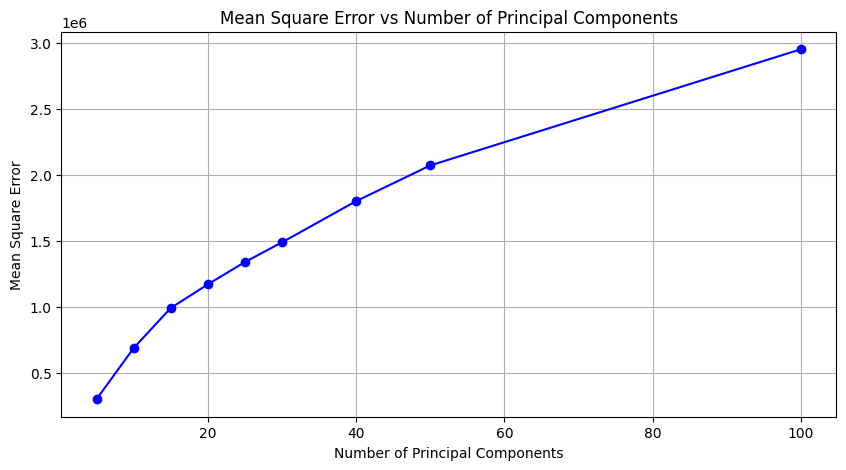

In [21]:
def compute_accuracy_and_mse_for_n_components(n_components, eigenvectors, mean_face, X_train, y_train, X_test, y_test):
    correct_predictions = 0
    total_squared_error = 0

    for i in range(len(X_test)):
        test_image = X_test[i]
        _, error, predicted_class = getClass(test_image, eigenvectors, mean_face, X_train, y_train, n_components)

        if predicted_class == y_test[i]:
            correct_predictions += 1
        total_squared_error += error ** 2

    accuracy = correct_predictions / len(X_test)
    mse = total_squared_error / len(X_test)
    return accuracy, mse

n_components_list = [5, 10, 15, 20, 25, 30, 40, 50, 100]
accuracies = []
mse_values = []

for n_components in n_components_list:
    accuracy, mse = compute_accuracy_and_mse_for_n_components(n_components, eigenvectors, meanFace, trainFaces_flat, labels, testFaces_flat, testLabels)
    accuracies.append(accuracy)
    mse_values.append(mse)
    print(f"Components: {n_components}, Accuracy: {accuracy:.4f}, MSE: {mse:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(n_components_list, mse_values, marker='o', linestyle='-', color='b')
plt.title('Mean Square Error vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Square Error')
plt.grid(True)
plt.show()


Plot Number of eigenvectors vs Logarithmic Mean Square Error

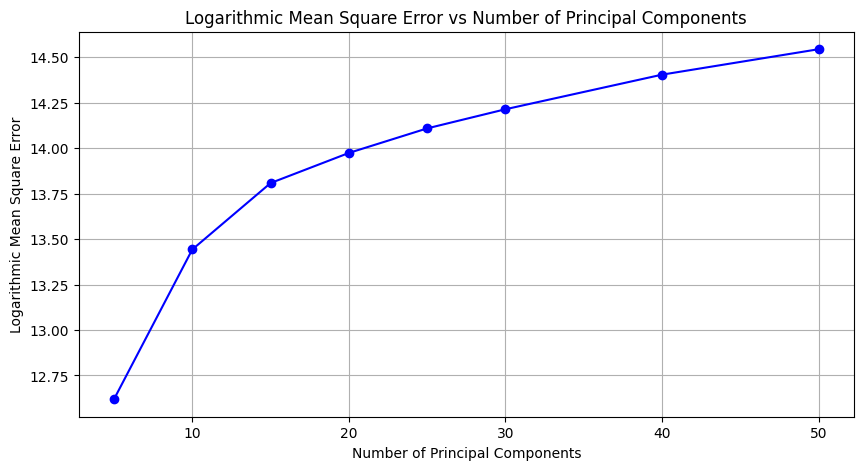

In [20]:
log_mse_values = []
for i in mse_values:
  log_mse_values.append(np.log(i))

plt.figure(figsize=(10, 5))
plt.plot(n_components_list, log_mse_values, marker='o', linestyle='-', color='b')
plt.title('Logarithmic Mean Square Error vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Logarithmic Mean Square Error')
plt.grid(True)
plt.show()


Distance in High-Dimensional Space: The MSE in our case likely represents the sum of squared distances in the PCA-transformed space between each test image and its closest training image. As we increase the number of principal components, we are essentially adding more dimensions to this space.

Magnitude of Projection Increases: With more dimensions (principal components), the magnitude of the projection of any image onto this space can increase because we're retaining more variance (or more features of the face). While this can improve the ability to discriminate between different faces (hence higher accuracy), it also means that the Euclidean distance between points (faces) in this higher-dimensional space can naturally be larger.


High Accuracy: The accuracy of the model is increasing or remains high as we add more components, indicating that the model is better able to correctly identify the faces. This is the primary goal of our face recognition task.

#### Dimensionality vs. Discriminability:
The increase in MSE reflects the higher dimensionality and discriminability of the PCA space with more components. It's a natural outcome of how distances scale in higher-dimensional spaces and not necessarily indicative of a problem, provided our model's accuracy is satisfactory.